In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sys
import os
import scipy.cluster.hierarchy as sch
from typing import List
import scipy.stats as stats 
from scipy.optimize import leastsq
import itertools
import functools
from utils import *

%matplotlib inline

## • Set some plotting parameters and load the data

In [2]:
default_plotting_params()

In [3]:
timelines_deference, timelines_deference_cleaned, \
    timelines_deference_self_other, timelines_deference_category = load_data()

## • Deference for "self" vs "other"
### Essentially, some respondents gave "Me", "myself", "self", or similar as their deference. It's not clear to me whether this is a reasonable interpretation of "deference", which implies some agent other than oneself, but this is the comparison for "self" vs "other" responses across the deference rankings.

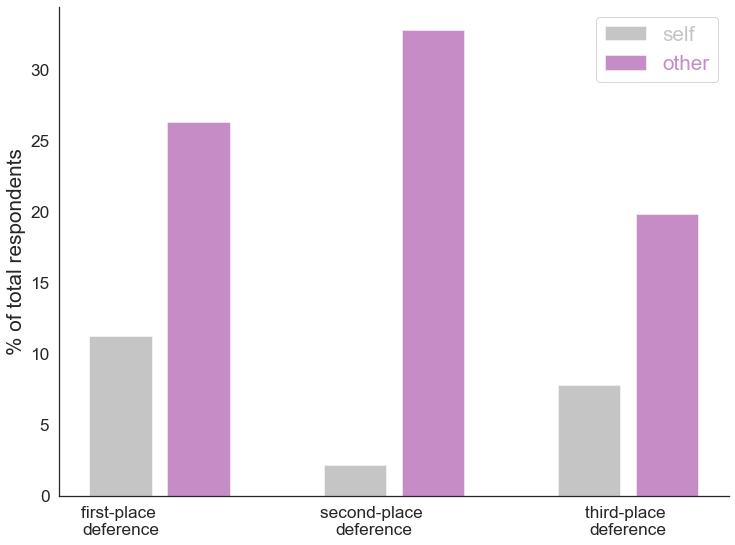

In [4]:
plot_self_vs_other(data=timelines_deference_self_other)

## * Deference by category – do respondents defer to individuals, groups of individuals, or organisations?
### I'll give a more detailed description, along with some examples, here

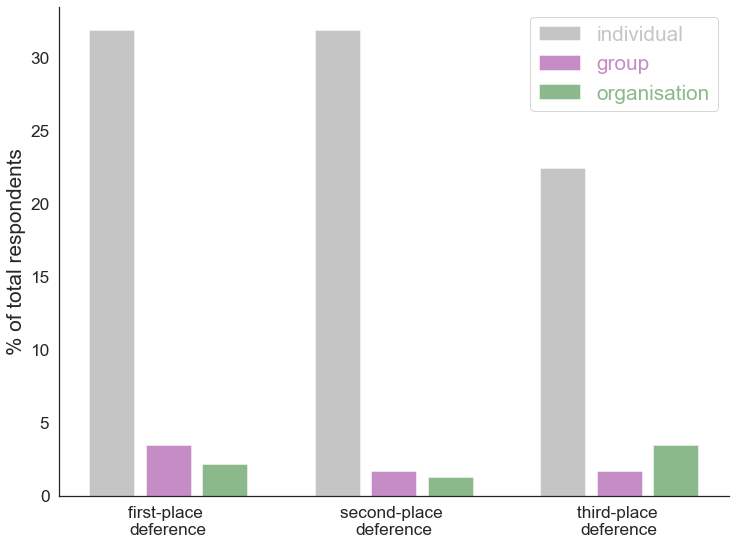

In [5]:
plot_deference_by_category(data=timelines_deference_category)

## • Visualise the responses for each deference rank

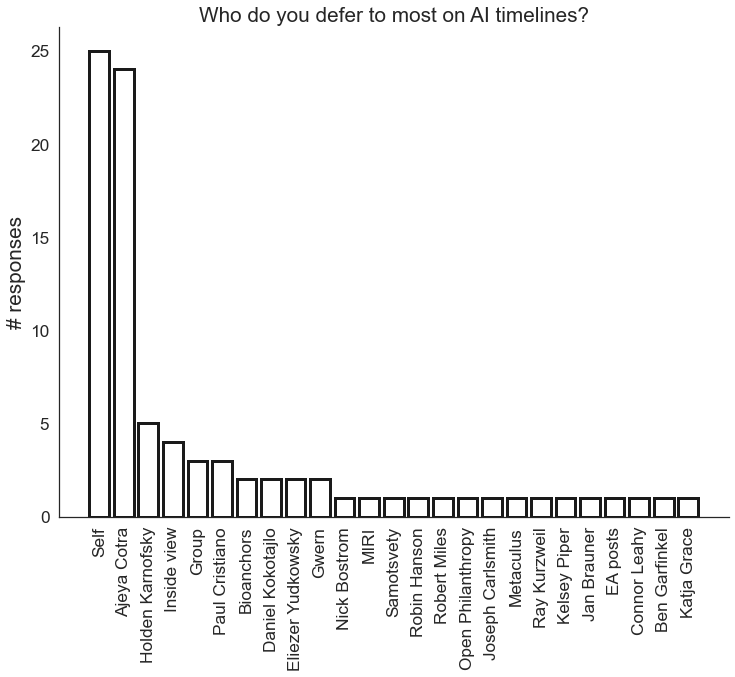

In [6]:
visualise_deference_responses(deference_rank=1, data=timelines_deference_cleaned, include_self_responses=True)

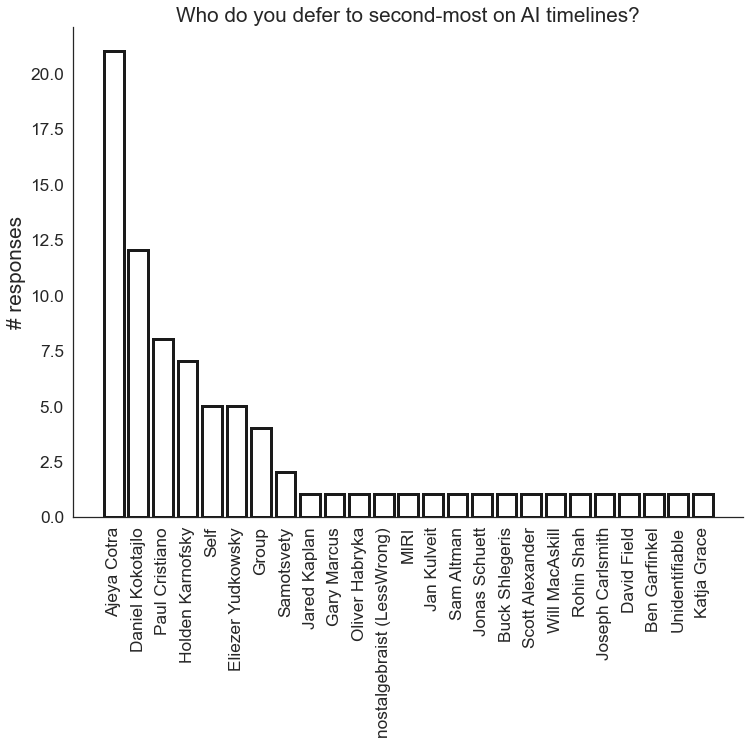

In [7]:
visualise_deference_responses(deference_rank=2, data=timelines_deference_cleaned, include_self_responses=True)

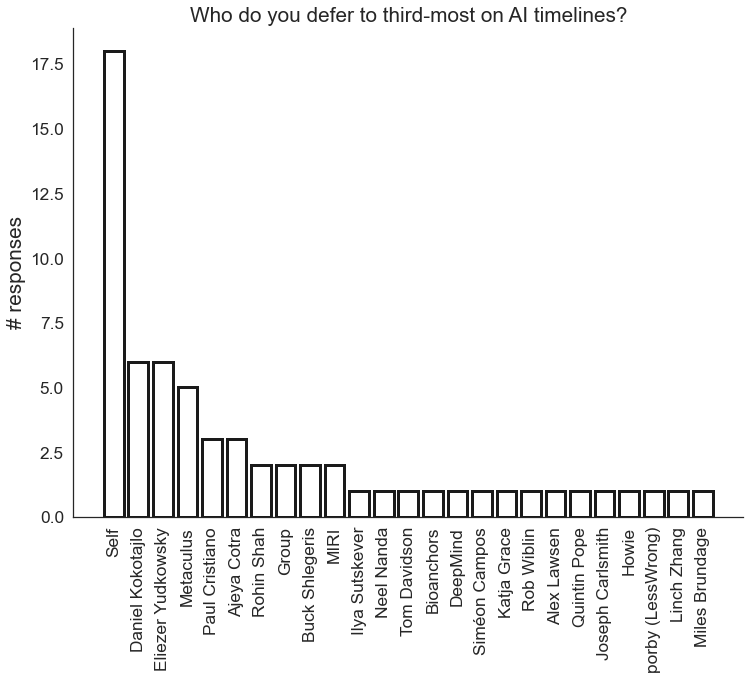

In [8]:
visualise_deference_responses(deference_rank=3, data=timelines_deference_cleaned, include_self_responses=True)

## • Generate a weighted score for deference:
### Three points for "most deference", two points for "second-most", and one point for "third-most"
### DM: fill out a better description....

In [9]:
counts = generate_deference_counts(timelines_deference_cleaned)
result = functools.reduce(lambda x, y: x.combine(y, combine_func), \
                          [counts[column_titles()[0]], counts[column_titles()[1]], counts[column_titles()[2]]])
result_ = result.sort_values(ascending=False)

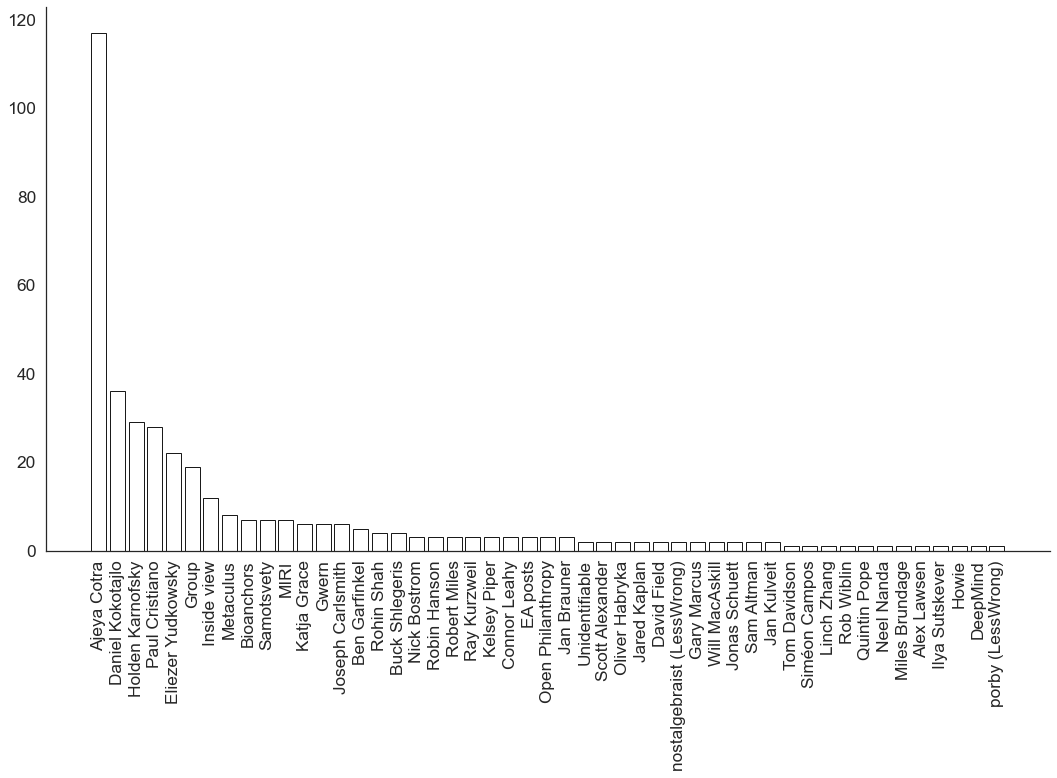

In [10]:
visualise_weighted_deference(counts[column_titles()[0]], counts[column_titles()[1]], counts[column_titles()[2]])